# Isotherm modelling

In this notebook we'll attempt to model isotherms using the included models. First, make sure the data is imported by running the import notebook.

In [1]:
%run import.ipynb
import pygaps as pg
import matplotlib.pyplot as plt

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


## Selecting models

Instead of recreating isotherms, we'll fit PointIsotherms with the `model_iso` function. Let's select one of the isotherms and attempt to model it with the Double Site Langmuir model. It is worth noting that, if the branch is not selected, the model will automatically select the adsorption branch.

Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.339


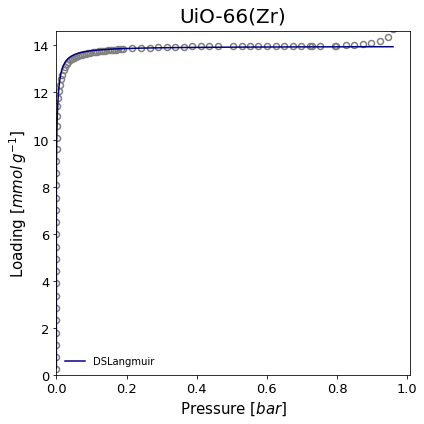

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='UiO-66(Zr)')
model = pg.model_iso(isotherm, model='DSLangmuir', verbose=True)

The original model is therefore reasonably good, even if there are likely microporous filling steps at low pressure which are not fully captured. It's important to note that the ModelIsotherm has almost of a PointIsotherm and can be used for all calculations. For example:

Material: UiO-66(Zr)
Adsorbate: nitrogen
Temperature: 77.355K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	branch: ads
	iso_type: Isotherme
	lab: MADIREL
	machine: Triflex
	material_batch: Test
	t_act: 200.0
	user: PI
DSLangmuir isotherm model.
RMSE = 0.3391
Model parameters:
	n_m1 = 4.74
	K1 = 243.29
	n_m2 = 9.22
	K2 = 59122.59
Model applicable range:
	Pressure range: 0.00 - 0.96
	Loading range: 0.26 - 14.68

Langmuir surface area: a = 1.36e+03 m2/g
Minimum pressure point is 0.064 and maximum is 0.899
The slope of the Langmuir line: s = 7.17e+01
The intercept of the Langmuir line: i = 9.74e-02
The Langmuir constant is: K = 735.4
Amount for a monolayer: n = 1.40e-02 mol/g


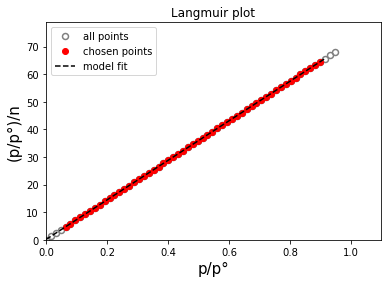

In [3]:
print(model)
res = pg.area_langmuir(model, verbose=True)

Let's now apply the same model to another isotherm.

In [4]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='SiO2')
try:
    model = pg.model_iso(isotherm, model='DSLangmuir', verbose=True)
except Exception as e:
    print(e)

Attempting to model using DSLangmuir.

Fitting routine with model DSLangmuir failed with error:
	The maximum number of function evaluations is exceeded.
Try a different starting point in the nonlinear optimization
by passing a dictionary of parameter guesses, param_guess, to the constructor.
Default starting guess for parameters:
{'n_m1': 8.584125, 'K1': 18.630173351237513, 'n_m2': 8.584125, 'K2': 27.94526002685627}



We can increase the number of minimisation iterations manually, by specifying an `optimisation_params` dictionary which will be passed to the relevant Scipy routine. However, the model chosen may not fit the data, no matter how much we attempt to minimise the function, as seen below.

In [5]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='SiO2')
try:
    model = pg.model_iso(isotherm, model='DSLangmuir', verbose=True, optimization_params=dict(max_nfev=1e3))
except Exception as e:
    print(e)

Attempting to model using DSLangmuir.

Fitting routine with model DSLangmuir failed with error:
	The maximum number of function evaluations is exceeded.
Try a different starting point in the nonlinear optimization
by passing a dictionary of parameter guesses, param_guess, to the constructor.
Default starting guess for parameters:
{'n_m1': 8.584125, 'K1': 18.630173351237513, 'n_m2': 8.584125, 'K2': 27.94526002685627}



## Guessing models

We also have the option of guessing a model instead. This option will calculate model fits with a **selection** of the available models, and select the one with the smallest root mean square. Let's try this on the previous isotherm.

Attempting to model using Henry.
Model Henry success, RMSE is 1.560
Attempting to model using Langmuir.
Modelling using Langmuir failed. Fitting routine outputs: 

Fitting routine with model Langmuir failed with error:
	The maximum number of function evaluations is exceeded.
Try a different starting point in the nonlinear optimization
by passing a dictionary of parameter guesses, param_guess, to the constructor.
Default starting guess for parameters:
{'n_m': 17.16825, 'K': 46.575433378093784}

Attempting to model using DSLangmuir.
Modelling using DSLangmuir failed. Fitting routine outputs: 

Fitting routine with model DSLangmuir failed with error:
	The maximum number of function evaluations is exceeded.
Try a different starting point in the nonlinear optimization
by passing a dictionary of parameter guesses, param_guess, to the constructor.
Default starting guess for parameters:
{'n_m1': 8.584125, 'K1': 18.630173351237513, 'n_m2': 8.584125, 'K2': 27.94526002685627}

Attempting to model

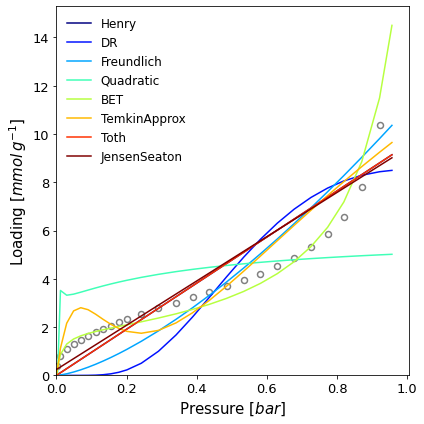

In [6]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='SiO2')

model = pg.model_iso(isotherm, model='guess', verbose=True)

We can see that most models failed or have a poor fit, but the BET model has been correctly identified as the best fitting one.

## Other options

We can also attempt to model the desorption branch of an isotherm, and provide a manual list of models to attempt to guess, including specialised models which are not usually included in the guessing routine.

Attempting to model using GAB.
Model GAB success, RMSE is 0.415
Attempting to model using BET.
Model BET success, RMSE is 0.415
Attempting to model using Langmuir.
Model Langmuir success, RMSE is 0.870
Best model fit is GAB.


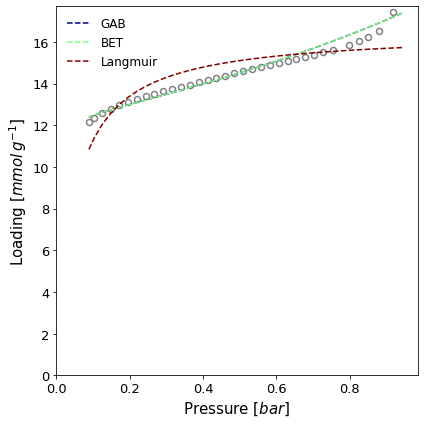

In [7]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='Takeda 5A')

model = pg.model_iso(isotherm, model=['GAB', 'BET', 'Langmuir'], branch='des', verbose=True)

Just because a the minimisation has successfully produced a model that **does NOT mean** that the model is accurate. For example, trying to model the MCM-41 sample with a Langmuir model does not throw any errors but it is obvious that the model is not representative of the mesoporous condensation in the pores.

Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.644


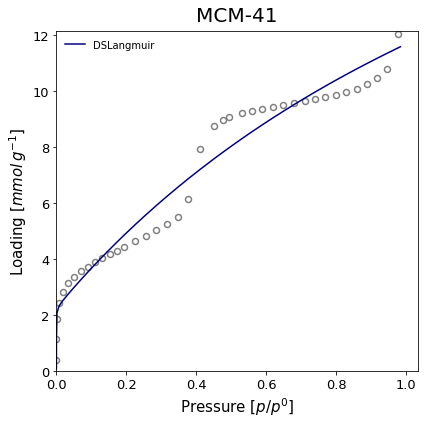

In [8]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')

model = pg.model_iso(isotherm, model="DSLangmuir", verbose=True)

## Creating ModelIsotherms

ModelIsotherms do not need to be created from a PointIsotherm. They can also be created from raw data, or from pre-generated models. To create one from scratch:

<AxesSubplot:title={'center':'carbon'}, xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

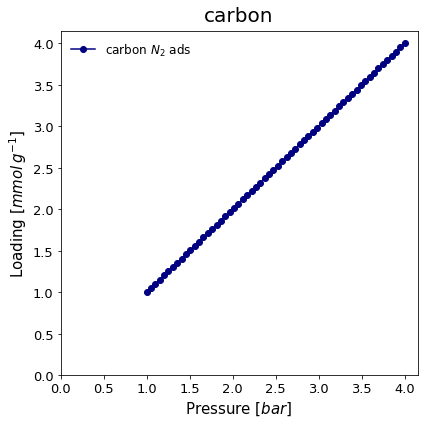

In [9]:
model_iso = pg.ModelIsotherm(
    material='carbon',
    adsorbate='N2',
    temperature=77,
    pressure=[1,2,3,4],
    loading=[1,2,3,4],
    model='Henry',
)
model_iso.plot()

Or if a model is to be created from pre-defined parameters, one can do:

<AxesSubplot:title={'center':'carbon'}, xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

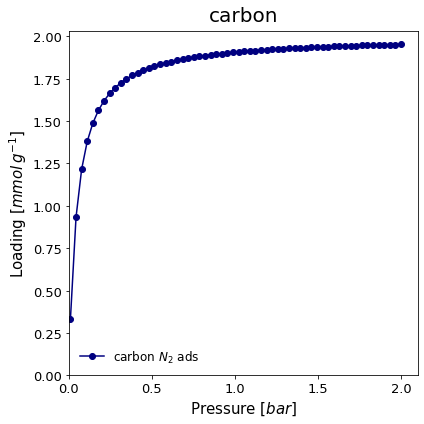

In [10]:
from pygaps.modelling import get_isotherm_model

model = get_isotherm_model(
    'Langmuir', params={
            'parameters' : {"K" : 20, "n_m": 2},
            'pressure_range' : (0.01, 2),
        }
)
model_iso = pg.ModelIsotherm(
    material='carbon',
    adsorbate='N2',
    temperature=77,
    model=model,
)
model_iso.plot()

More info can be found in the [manual section](https://pygaps.readthedocs.io/en/master/manual/modelling.html).